<a href="https://colab.research.google.com/github/Miftahul93/Pengembangan_Machine_Learning_Dicoding/blob/main/Lat_2_Pengembangan_ML_Klasifikasi_Banyak_Kelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Memasang drive ke notebook google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Melihat daftar dataset di folder dataset ML-Dicoding
!ls "gdrive/MyDrive/Dataset ML-Dicoding"

 ML-iris.zip
'ML-Mall Customer Segmentation Data.zip'
 ML-messy-vs-clean-room.zip
'ML-Pima Indians Diabetes Database.zip'
'ML-Salary data - Simple linear regression.zip'
 ML-Social_Network_Ads.zip
 ML-Submission-rockpaperscissors.zip
'Pengembangan ML'
'Submission_ML_Dicoding_Miftahul Ulum.zip'


In [ ]:
# Unzip
import os
import zipfile

local_zip = 'gdrive/MyDrive/Dataset ML-Dicoding/ML-iris.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

Pertama impor library yang dibutuhkan untuk latihan kita.

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Kemudian kita gunakan fungsi **read_csv()** untuk mengubah dataset menjadi pandas dataframe. Untuk menampilkan dataframe kita hanya perlu menulis nama dari dataframe kita.

In [ ]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Dapat kita lihat bahwa terdapat kolom id yang tidak ada hubungan dengan label sehingga kita perlu membuang kolom tersebut. Untuk membuang kolom dari dataframe gunakan fungsi **drop().**

In [ ]:
df = df.drop(columns='Id')

Selanjutnya kita perlu melakukan one hot encoding karena label kita merupakan data kategorikal. Fungsi **get_dummies()** memudahkan kita untuk melakukan hal ini.

In [ ]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


Kemudian, kita perlu menggabungkan kolom hasil one hot encoding dan membuang kolom spesies karena kolom tersebut tidak akan dipakai.

In [ ]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


Selanjutnya setelah dataframe kita olah, kita konversi dataframe tersebut menjadi numpy array dengan fungsi values dari dataframe.

In [ ]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

Nah, tahap berikutnya adalah kita memisahkan antara atribut dan label dengan menjalankan kolom di bawah.

In [ ]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]

# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

Lalu, kite perlu lakukan normalisasi data agar data dapat dipelajari dengan baik oleh jst kita.

In [ ]:
# Naomalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Lakukan pembagian data menjadi data latih dan data uji. Untuk ukuran data testing yang digunakan 30%. Anda dapat bereksperimen menggunakan nilai lainnya.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

Untuk arsitektur model kita kali mini menggunakan 3 buah layer. Activation function yang digunakan pada layer terakhir dipilih softmax karena activation tersebut umum dipakai untuk klasifikasi multi kelas seperti ini.

In [ ]:
model = Sequential([Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax'),])

Lanjutkan dengan menentukan optimizer dan loss function dari model. Untuk masalah klasifikasi multi kelas, Anda dapat menggunakan loss ‘categorical_crossentropy’.

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Nah, pada latihan ini ada sedikit perubahan. Fungsi fit() sekarang kita tampung ke dalam objek hist(history). Untuk apa kita melakukan hal ini? Temukan jawabannya di submodul berikutnya ya.

In [ ]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 14s 4ms/step - loss: 1.1132 - accuracy: 0.3659
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0747 - accuracy: 0.6563
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0256 - accuracy: 0.6757
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9924 - accuracy: 0.5726
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9612 - accuracy: 0.6479
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9303 - accuracy: 0.6542
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9020 - accuracy: 0.6500
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8695 - accuracy: 0.6594
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8426 - accuracy: 0.6510
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7991 - accuracy: 0.6729
Epoch 11/100
4/4 [==========

Terakhir kita bisa menguji akurasi prediksi model pada data uji.

In [ ]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0931 - accuracy: 0.9778


[0.0931408554315567, 0.9777777791023254]

 kita pasti penasaran kenapa menampung fungsi fit pada sebuah objek history. Jawabannya adalah karena kita dapat membuat plot dari akurasi dan loss model kita pada saat proses pelatihan. 

In [ ]:
# Import library matplotlib
import matplotlib.pyplot as plt

Kemudian dengan objek pyplot kita akan melakukan plot dari objek history. Objek history menampung informasi dari akurasi dan loss model pada setiap epoch di proses pelatihan. Sehingga kita bisa membuat plot akurasi atau loss dari model. Kode di bawah menunjukkan bagaimana kita bisa membuat plot loss dari model. Untuk mengakses loss kita bisa memanggil fungsi history pada objek history dan memilih metrik loss. Dari hasil plot loss di bawah Anda dapat hat bahwa loss model berkurang sangat signifikan dari epoch pertama sampai ke epoch ke-100.

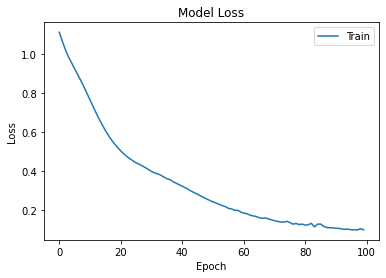

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

Untuk membuat plot dari akurasi kita bisa memilih metrik accuracy pada fungsi history. Dari hasil plot di bawah, cek bahwa akurasi model stagnan pada epoch di sekitar 20 dan juga kembali stagnan pada epoch di atas 80.

<function matplotlib.pyplot.show>

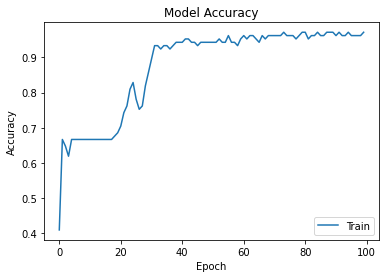

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show